## Kmeans experiments

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np

In [3]:
df_nouns_nb = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gender"])
df_adj_nb = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns=["gender"])
df_both_nb = pd.concat([df_nouns_nb, df_adj_nb], ignore_index=True)

# assign 0 for singular and 1 for plural
df_nouns_nb.loc[df_nouns_nb['number']=="singular",'num']=0
df_nouns_nb.loc[df_nouns_nb['number']=="plural",'num']=1

df_adj_nb.loc[df_adj_nb['number']=="singular",'num']=0
df_adj_nb.loc[df_adj_nb['number']=="plural",'num']=1


df_both_nb.loc[df_both_nb['number']=="singular",'num']=0
df_both_nb.loc[df_both_nb['number']=="plural",'num']=1


# target : number
Y_nb_N = df_nouns_nb["num"]
Y_nb_A = df_adj_nb["num"]
Y_nb_both = df_both_nb["num"]

# features : word embeddings dimensions
X_nb_N = df_nouns_nb.drop(columns=["Word", "number", "num"])
X_nb_A = df_adj_nb.drop(columns=["Word", "number", "num"])
X_nb_both = df_both_nb.drop(columns = ["Word","number", "num"] )

# normalize data to be between 0 and 1
X_nb_N = (X_nb_N - X_nb_N.min()) / (X_nb_N.max() - X_nb_N.min())
X_nb_A = (X_nb_A - X_nb_A.min()) / (X_nb_A.max() - X_nb_A.min())
X_nb_both = (X_nb_both - X_nb_both.min()) / (X_nb_both.max() - X_nb_both.min())

# split data into train and test sets
##X_nb_N_train, X_nb_N_test, Y_nb_N_train, Y_nb_N_test = train_test_split(X_nb_N, Y_nb_N, test_size=0.2, random_state=42)
##X_nb_A_train, X_nb_A_test, Y_nb_A_train, Y_nb_A_test = train_test_split(X_nb_A, Y_nb_A, test_size=0.2, random_state=42)
#X_nb_both_train, X_nb_both_test, Y_nb_both_train, Y_nb_both_test = train_test_split(X_nb_both, Y_nb_both, test_size=0.2, random_state=42)

X_nb_features = [X_nb_N, X_nb_A, X_nb_both]
Y_nb_features = [Y_nb_N, Y_nb_A, Y_nb_both]

In [4]:
from sklearn.cluster import KMeans

from sklearn.inspection import permutation_importance

Km_results = []

for i in range(3):
    
    X, Y = X_nb_features[i], Y_nb_features[i]

    # define a K means model
    km = KMeans(n_clusters=2,random_state=0)

    # fit the data set
    km.fit(X)

    # predict the result set
    Y_pred = km.labels_

    Y_test=Y 

    

    # Build a confusion matrix
    Km_results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    Km_results[i]["precision"] = Km_results[i]["cm"][0,0] / (Km_results[i]["cm"][0,0] + Km_results[i]["cm"][1,0])
    Km_results[i]["recall"] = Km_results[i]["cm"][0,0] / (Km_results[i]["cm"][0,0] + Km_results[i]["cm"][0,1])
    Km_results[i]["f1"] = 2 * Km_results[i]["precision"] * Km_results[i]["recall"] / (Km_results[i]["precision"] + Km_results[i]["recall"])
    Km_results[i]["accuracy"] = (Km_results[i]["cm"][0,0] + Km_results[i]["cm"][1,1]) / np.sum(Km_results[i]["cm"])
   
    # Store the importance of each feature
    #Km_results[i]["importances"] = km.coef_[0]

/Users/chunyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chunyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chunyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Experiment 1:

Precision: 0.6485292261078147
Recall: 0.5973255813953489
F1 score: 0.6218751891531991
Accuracy: 0.528100921589364


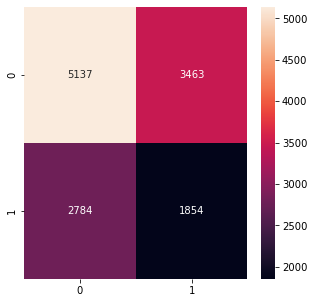

Experiment 2:

Precision: 0.6086036671368125
Recall: 0.43432310015098136
F1 score: 0.5069016152716594
Accuracy: 0.469845279444269


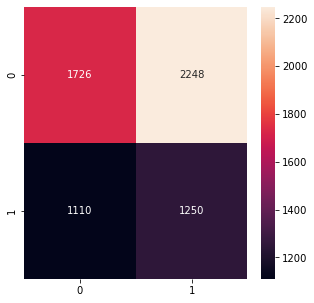

Experiment 3:

Precision: 0.6397177059138824
Recall: 0.5695085096230317
F1 score: 0.6025748906092225
Accuracy: 0.5173717555691805


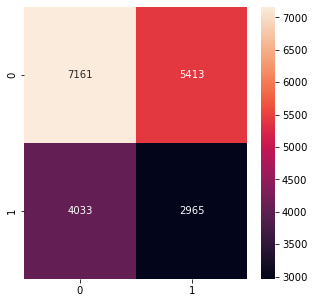

In [5]:
for i in range(3):

    print(f"Experiment {i+1}:\n")
    
    # Plot top 10 most important features
    #indices = np.argsort(abs(Km_results[i]["importances"]))[::-1]
    #for ind in [int(ind) for ind in indices[:10]]:
        #print(f"-{ind}: {Km_results[i]['importances'][ind]}")

    # plot all the features coefficients
    #plt.figure(figsize=(10,5))
    #plt.bar(range(len(Km_results[i]["importances"])), Km_results[i]["importances"])

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {Km_results[i]['precision']}")
    print(f"Recall: {Km_results[i]['recall']}")
    print(f"F1 score: {Km_results[i]['f1']}")
    print(f"Accuracy: {Km_results[i]['accuracy']}")

   

    
    
    
    # Plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(Km_results[i]["cm"], annot=True, fmt="d")
    plt.show()